# Heart Disease Prediction Using Logistic Regression

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
df = pd.read_csv('framingham (1).csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [29]:
df.shape

(4240, 16)

In [30]:
df.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [32]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [33]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [34]:
df.dropna(axis = 0, inplace = True)
print(df.shape)

(3658, 16)


In [35]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

### Correlation Matrix

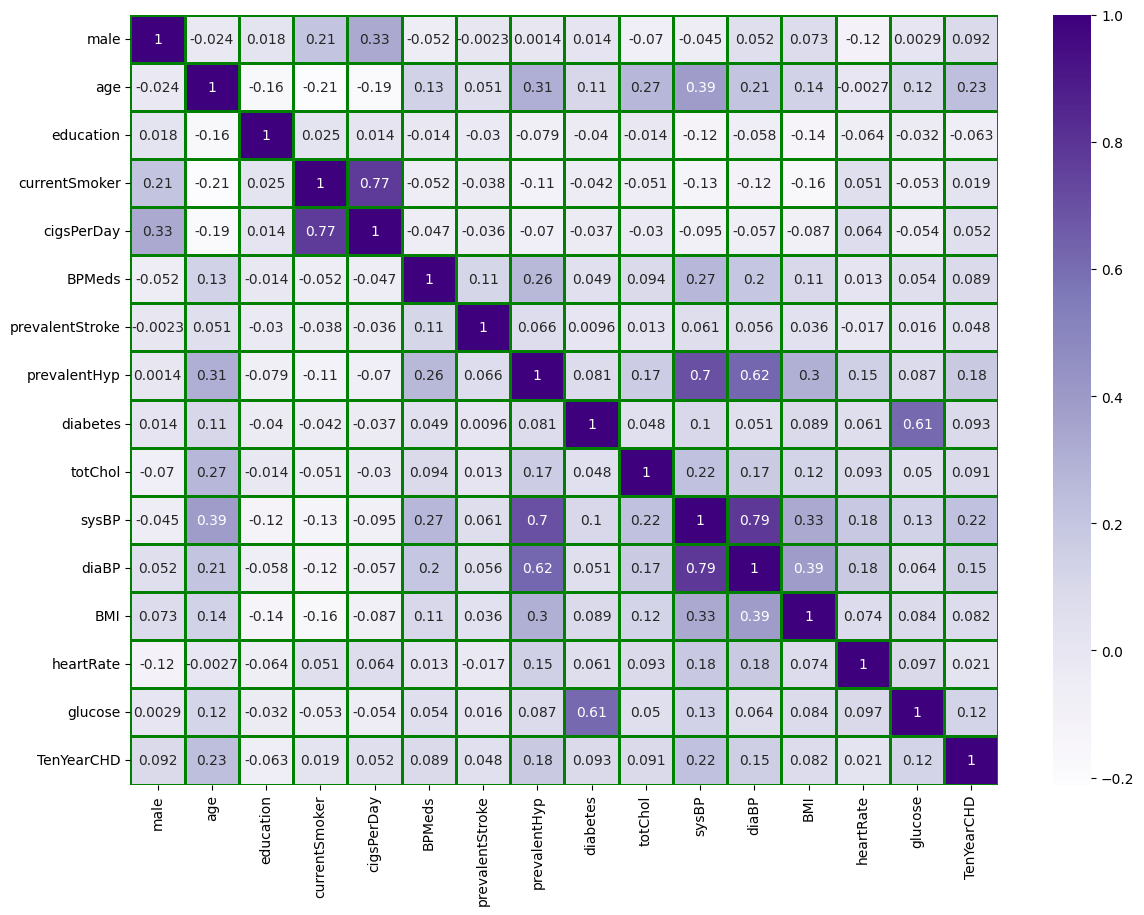

In [36]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

### Pairplot

### Countplot of people based on their sex and whether they are Current Smoker or not

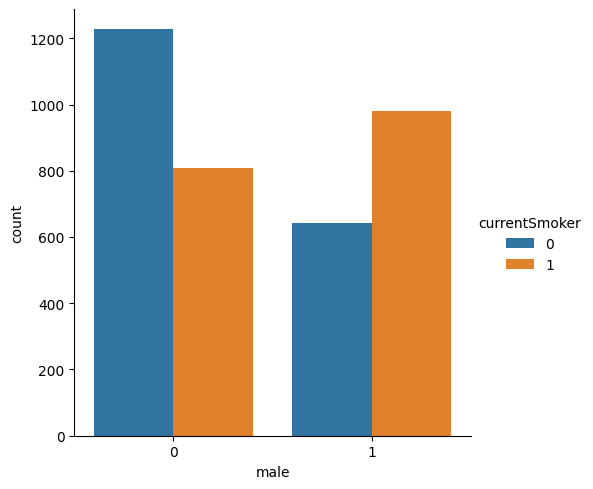

In [37]:
sns.catplot(data=df, kind='count', x='male',hue='currentSmoker')
plt.show()

### Countplot - subplots of No. of people affecting with CHD on basis of their sex and current smoking.

D:\Temp\ipykernel_7724\4157836991.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, kind='count', x='TenYearCHD', col='male',row='currentSmoker', palette='Blues')


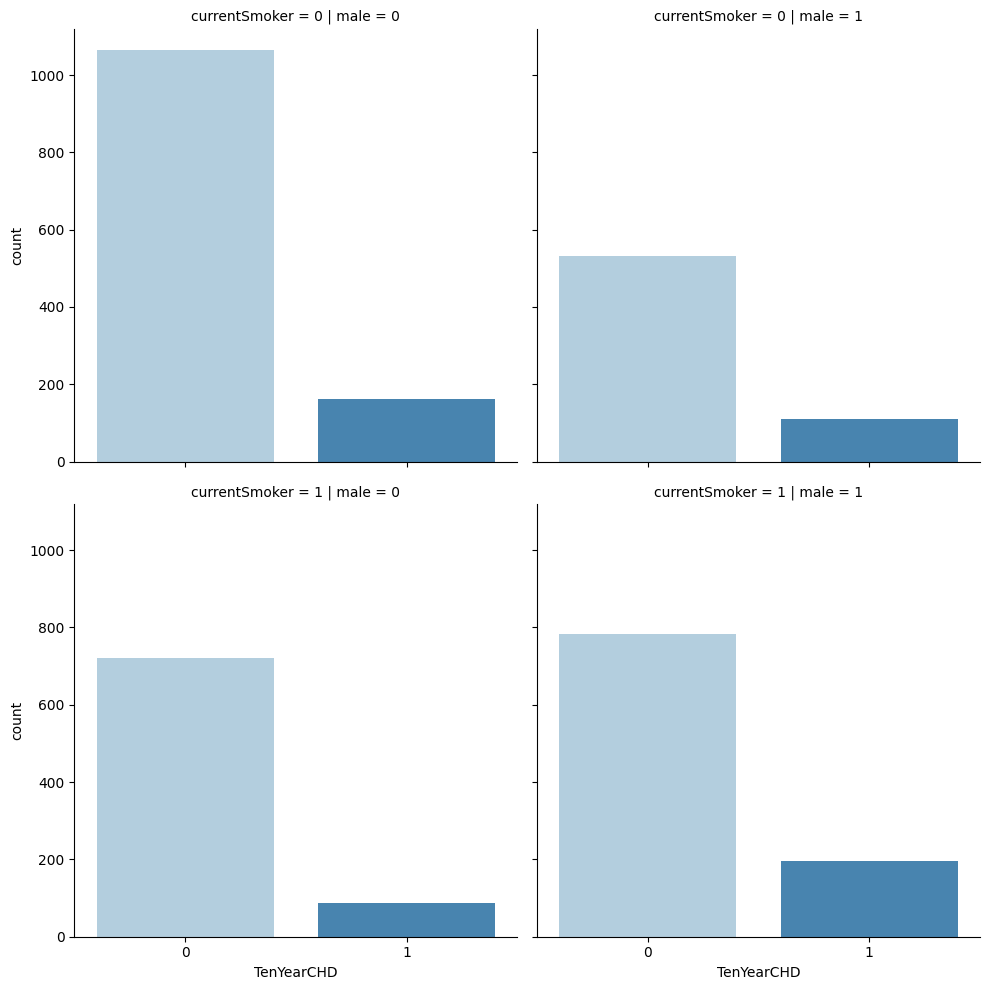

In [38]:
sns.catplot(data=df, kind='count', x='TenYearCHD', col='male',row='currentSmoker', palette='Blues')
plt.show()

## Machine Learning Part

### Separating the data into feature and target data.

In [39]:
X = df.iloc[:,0:15]
y = df.iloc[:,15:16]
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

d:\heart\venv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
d:\heart\venv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X = pca.fit_transform(X_scaled)
print(X)

[[-1.9018416  -1.09573422  0.0613269   0.78592926 -0.38957905]
 [-0.22124913 -1.29650191 -0.24305813 -0.03142518  1.89452742]
 [-1.38433337  1.21238452 -0.0277002  -0.70619896 -0.07896149]
 ...
 [-1.02852402  0.20524002  0.6289454   0.59602871  1.07590953]
 [ 2.3244809   1.60731124 -0.65933593 -0.77013816 -0.97631377]
 [ 0.25121067 -0.81951791 -0.57117936 -0.39263504 -2.03025969]]


In [41]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


### Importing the model and assigning the data for training and test set

d:\heart\venv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


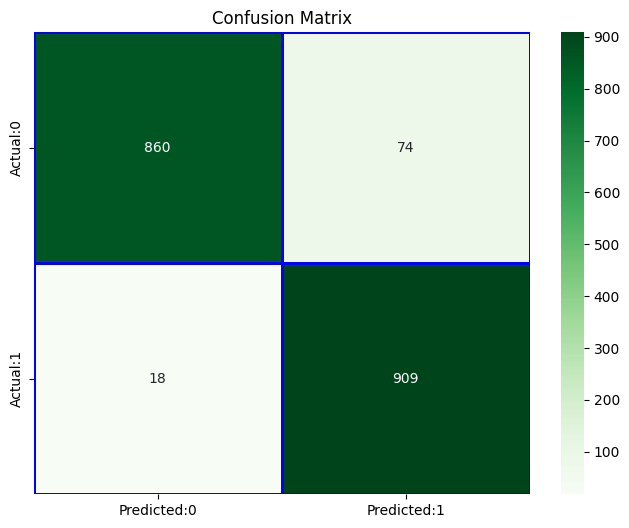

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       934
           1       0.92      0.98      0.95       927

    accuracy                           0.95      1861
   macro avg       0.95      0.95      0.95      1861
weighted avg       0.95      0.95      0.95      1861



In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Predicted:0', 'Predicted:1'],
            yticklabels=['Actual:0', 'Actual:1'], linecolor='blue', linewidth=2)
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))



### Applying the ML model - Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Training the data

In [44]:
logreg.fit(X_train, y_train)

d:\heart\venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Testing the data

In [45]:
y_pred = logreg.predict(X_test)

### Predicting the score

In [46]:
score = logreg.score(X_test, y_test)
print("Prediction score is:",score)

Prediction score is: 0.6496507254164428


## Getting the Confusion Matrix and Classification Report

### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[632 302]
 [350 577]]


### Classification Report

In [48]:

report = classification_report(y_test, y_pred, target_names=["No CHD", "CHD"])
print("\nClassification Report:\n")
print(report)



Classification Report:

              precision    recall  f1-score   support

      No CHD       0.64      0.68      0.66       934
         CHD       0.66      0.62      0.64       927

    accuracy                           0.65      1861
   macro avg       0.65      0.65      0.65      1861
weighted avg       0.65      0.65      0.65      1861



### Plotting the confusion matrix

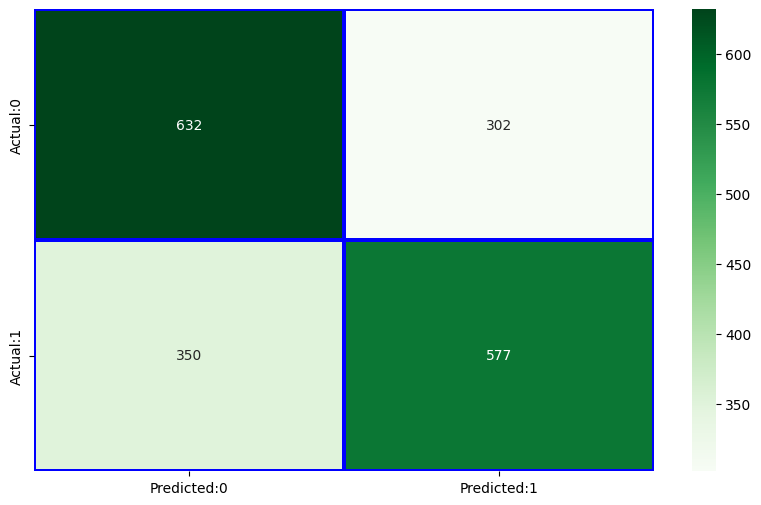

In [49]:
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue", linewidths=1.5)
plt.show()

In [50]:
import pickle
objects_to_save = {
    "rf_model": model,
    "log_reg_model": logreg,
    "scaler": scaler,
    "pca": pca
}

# Save as one pickle file
with open("heart_disease_models.pkl", "wb") as f:
    pickle.dump(objects_to_save, f)

print("✅ All models and preprocessing objects saved as heart_disease_model.pkl")


✅ All models and preprocessing objects saved as heart_disease_model.pkl
